## x2data1.txt

In this exercise we will be predicting whether the student gets admitted into a university or not. our task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [3]:
# import all the important libraries
# organize imports

# Used for computations of numerical data.
import numpy as np

# Used for reading data and data manipulation
import pandas as pd

# Optimization module in scipy
from scipy import optimize
import utils

# Used for graphing data.
import matplotlib.pyplot as plt

# Vectorized sigmoid function
from scipy.special import expit

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# ==================== Part 1: Plotting ====================
### Reading and plotting data

In [4]:
# Loading data
# The first two columns contains the exam scores and the third column contains the label.
path = 'C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex2-jin\\ex2data1.txt'
# Converting the file into comma separated data
cols = np.loadtxt(path, delimiter=',', usecols=(0,1,2), unpack=True) 
# Converting the data into the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
# Number of training examples
m = y.size 

# Settingup the data matrix appropriately, and add ones for the intercept term
# Insert the usual column of 1's into the "X" matrix for θ₀
X = np.insert(X,0,1, axis=1)
cols

array([[34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
        45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
        95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914,
        53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373,
        67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145,
        62.27101367, 80.19018075, 93.1143888 , 61.83020602, 38.7858038 ,
        61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374,
        54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003,
        83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177,
        62.22267576, 77.19303493, 97.77159928, 62.0730638 , 91.5649745 ,
        79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612,
        49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206,
        75.39561147, 35.28611282, 56.2538175 , 30.05882245, 44.66826172,
        66.56089447, 40.45755098, 49.07256322, 80.2

In this dataset we have two feature variables(independent) and one output variable(dependent)-the value of 1 means the candidate got admission and 0 means he didnt get admission.

### Visualizing the data

Its best to visualize the data before starting the algorithm so We start the exercise by first plotting the data to understand the problem we are working with.

In [3]:
# Dividing the sample into two: ones with positive classification, one with null classification
# The shape attribute for numpy arrays returns the dimensions of the array. 
# If X has n rows and m columns, then X.shape is (n,m)
# In simple print array of x if y=0 or y=1
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

# Checking to make sure, i included all entries right
print ("Included everything? ",(len(pos)+len(neg) == X.shape[0]))
print("X:", X.shape)
print("y:", y.shape)
print("pos:", pos.shape)
print("neg:", neg.shape)

Included everything?  True
X: (100, 3)
y: (100, 1)
pos: (60, 3)
neg: (40, 3)


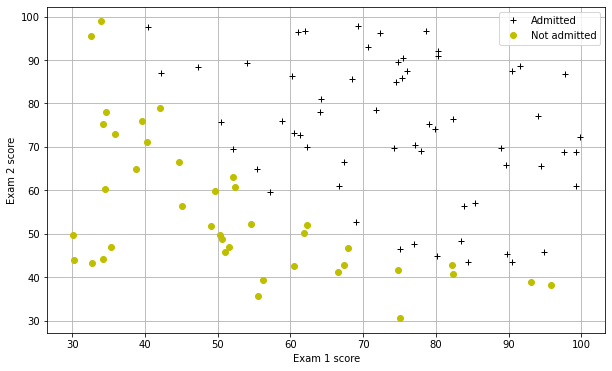

In [4]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
plotData()

In [5]:
print('positive=', len(pos))
print('negative=', len(neg))

positive= 60
negative= 40


# ============ Part 2: Compute Cost and Gradient ============
### Sigmoid Function
Before getting into cost function, lets recall the sigmoid function:
the hypothesis function in logistic regression is given by:  
$h_θ(x) = g(θ^T x)$  
While the sigmoid function is given by:  
$g(z) = {1}/{1+e^{-z}}$

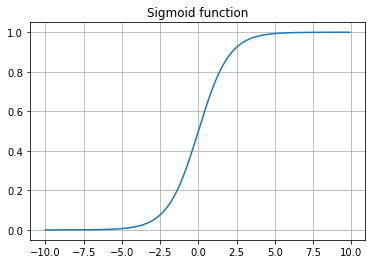

In [6]:
myx = np.arange(-10,10,.1)
plt.plot(myx,expit(myx))
plt.title("Sigmoid function")
plt.grid(True)

### Hypothesis Function, Cost Function and gradient function

The hypothesis function in logistic regression is given as:
 $h_θ(x) = g(θ^T(x))$

Recalling the cost function in logistic regression:  
$J(θ) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$    
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1, \cdots , n$) is defined as follows:
$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}$

In [8]:
# Logistic hypothesis function
def h(mytheta, myX): 
    return expit(np.dot(myX, mytheta))

# Cost function, default lambda (regularization) 0
def computeCost(mytheta, myX, myy, mylambda = 0.): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta, myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta, myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [9]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.6931471805599452

# ============= Part 3: Optimizing using scipy.optimize  =============
In the previous assignment, we found the optimal parameters of a linear regression model by implementing gradient descent. we wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, we will use the scipy.optimize module. SciPy is a numerical computing library for python. It provides an optimization module for root finding and minimization. As of scipy 1.0, the function scipy.optimize.minimize is the method to use for optimization problems(both constrained and unconstrained).  

For logistic regression, we want to optimize the cost function $J(θ)$ with parameters $(θ)$. Concretely, we are going to use optimize.minimize to find the best parameters  for the logistic regression cost function, given a fixed dataset (of X and y values). we will pass to optimize.minimize the following inputs:  

costFunction: A cost function that, when given the training set and a particular $(θ)$, computes the logistic regression cost and gradient with respect to $(θ)$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.  
initial_theta: The initial values of the parameters we are trying to optimize.  
(X, y): These are additional arguments to the cost function.  
jac: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)  
method: Optimization method/algorithm to use  
options: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.  
If we have completed the costFunction correctly, optimize.minimize will converge on the right optimization parameters and return the final values of the cost and $(θ)$  in a class object. Notice that by using optimize.minimize, we did not have to write any loops yourself, or set a learning rate like we did for gradient descent. This is all done by optimize.minimize: we only needed to provide a function calculating the cost and the gradient.  


In [10]:
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta, myX, myy, mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [11]:
theta, mincost = optimizeTheta(initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [12]:
# Calling my costFunction function using the optimal parameters of θ. 
#expected cost is about 0.203."
computeCost(theta, X, y)

0.2034977015902151

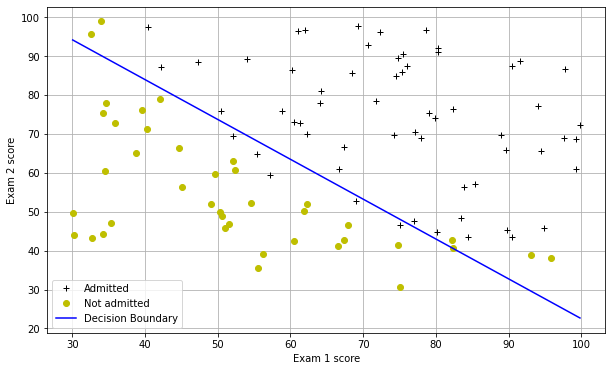

In [13]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

In [14]:
# ============== Part 4: Predict and Accuracies ==============

In [15]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#we should expect to see an admission probability of 0.776.
h(theta,np.array([1, 45.,85.]))

0.7762915904112411

In [16]:
def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

In [17]:
#Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print ("Fraction of training samples correctly predicted: %f." % prcnt_correct) 


Fraction of training samples correctly predicted: 0.890000.


## ex2data2.txt

### LETS JUST FOLLOW THE SAME STEPS WE DID FOR THE PART ONE OF THIS EXERCISE.
I am not good at regularization but i will still try to make something out of it...

### Visualization

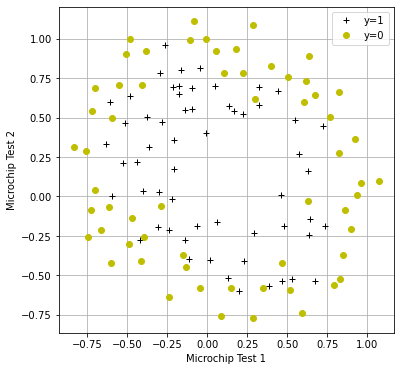

In [18]:
path = 'C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex2-jin\\ex2data2.txt'
cols = np.loadtxt(path,delimiter=',',usecols=(0,1,2),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)
plt.figure(figsize=(6,6))
plotData()

In [19]:
# this is an alternative for the octave code
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

In [20]:
mappedX

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

### Cost function and gradient

In [21]:
# Cost function is the same as the one implemented above, as we included the regularization
# toggled off for default function call (lambda = 0)
# we do not need separate implementation of the derivative term of the cost function
# Because the scipy optimization function we are using only needs the cost function itself
#Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
#and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.6931471805599453

### Learning parameters using fminunc

In [22]:
#I noticed that fmin wasn't converging (passing max # of iterations)
#so let's use minimize instead

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

### Plotting

In [23]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

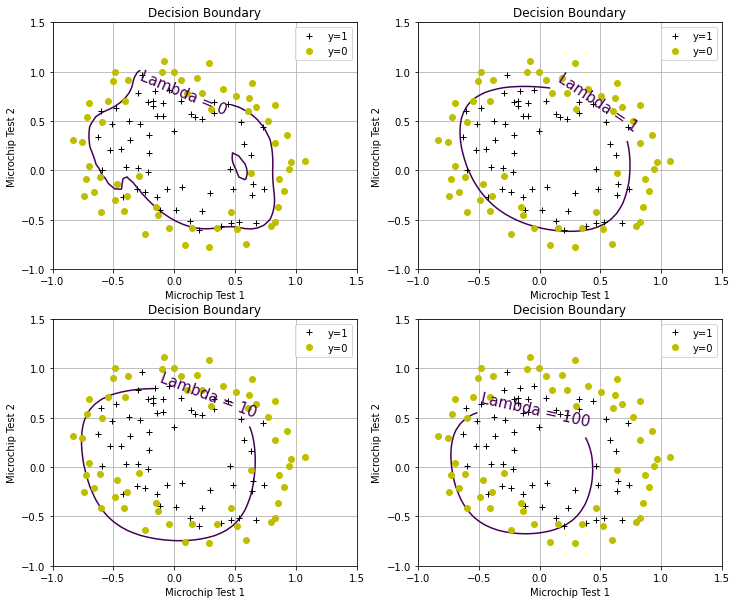

In [24]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)